In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xi = np.linspace(-10,10,400)
t = np.linspace(0,4*np.pi,200)
dt = t[1] - t[0]
Xgrid, T = np.meshgrid(xi,t)

In [4]:
#Creo dos patrones espacio-temporales
#Voy a crear dos señales, mezclarlas, y de la mezcla, intentra identificar/extraer cada una (mix => unmix)
f1 = (1 / np.cosh(Xgrid + 3)) * np.exp(1j * 2.3 * T)
f2 = (1 / np.cosh(Xgrid)) * np.tanh(Xgrid) * (2 * np.exp(1j * 2.8 * T))
f = f1 + f2
#Estoy haciendo la sumatoria que no entiendo, (sum(b_i * Phi_i * exp(1j * omega_i * t)))

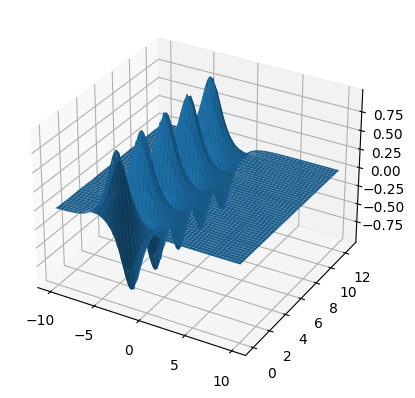

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xgrid, T, np.real(f1))

plt.show()


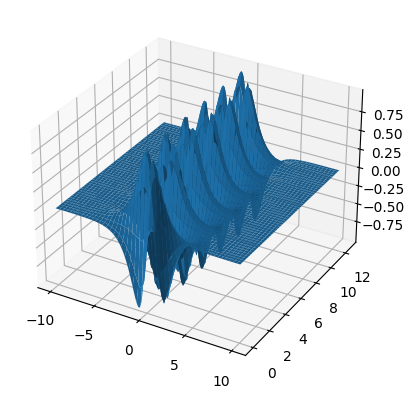

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xgrid, T, np.real(f2))

plt.show()

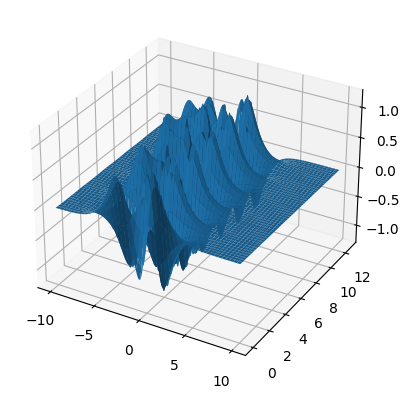

In [108]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xgrid, T, np.real(f))

plt.show()

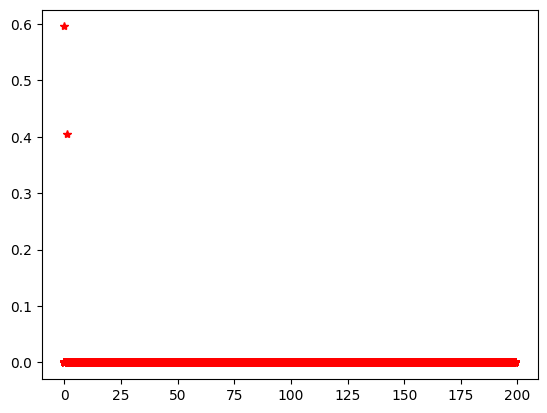

(200, 400)


In [7]:
#Realizo SVD de la señal mezclada
U, S, V = np.linalg.svd(f.T)
#Asi obtengo una estructra de rango inferior (Low rank structure)

fig, ax = plt.subplots(1,1)
ax.plot(np.diag(S) / np.sum(np.diag(S)), '*', color='red')
plt.show()
#Hay dos modos predominantes
#Esta es la estructura de rango inferior que estoy buscando
#U representa 
#V representa las dinamicas de tiempo
print(f.shape)

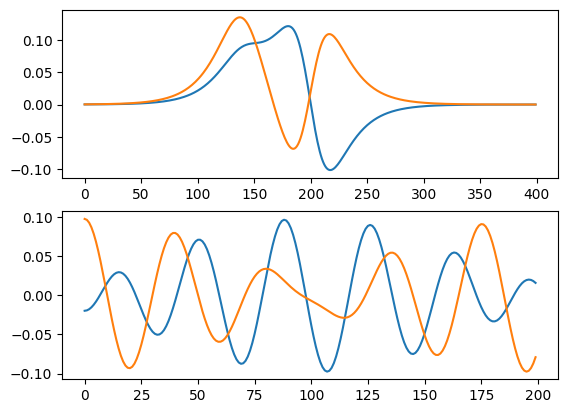

In [8]:
#U representa 
#V representa las dinamicas de tiempo
fig, ax = plt.subplots(2,1)

#Si ploteo mas de dos columnas podre ver que la tercera ya no tiene significado (It's junk)
#ax[0].plot(np.real(U[ : , : 3]))
#ax[1].plot(np.real(U[ : , : 3]))

ax[0].plot(np.real(U[ : , : 2]), label='Modes')
ax[1].plot(np.real((V.T)[ : , : 2]), label='Lo que hacen en el tiempo')
#ax[0].legend()
#ax[1].legend()
plt.show()
#Un modo deberia ser una sech, y el otro una sech * tanh. (Graficos del pizarron del video(minuto21))


In [9]:
#DMD

X = f.T        #Transpongo para que las filas sean medidas espaciales y las columnas series de tiempo

X1 = X[ : , : -1]
X2 = X[ : , 1 :]

r = 2
#Primer paso del algoritmo
U, S, V = np.linalg.svd(X1)
#Solamente me importan las dos primeras columnas
Ur = U[ : , :r]

Sr = np.diag(S[ : r])    #Matriz 2x2 (Contiene los dos valores singulares predominantes)

Vr = V[ : , : r]

In [10]:
#Contruyo la matriz A tilde

Sr_inv = np.linalg.inv(Sr)
A_tilde = Ur.T @ X2 @ Vr @ Sr_inv

#Hago la autodescomposicion de A tilde

D, W = np.linalg.eig(A_tilde)    #D es diagonal y tiene los autovalores
                                 #W tiene en sus columnas los autovectores
Dm = np.diag(D)

In [12]:
#Ahora quiero volver a la dimension original de los datos
#Phi contendra mis "DMD Modes"
Phi = X2 @ Vr @ Sr_inv @ W      #DMD Modes. Notar que Ur = X2 @ Vr @ Sr_inv
'''Revisar esto'''
#Los autovalores ya estan guardados como una lista en D
omega = np.log(D) / dt   #No se que hace esto (minuto 32:20 del video)
print(omega)

[-44.67807446 +5.38969903j -33.71477824-36.27895835j]


c:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


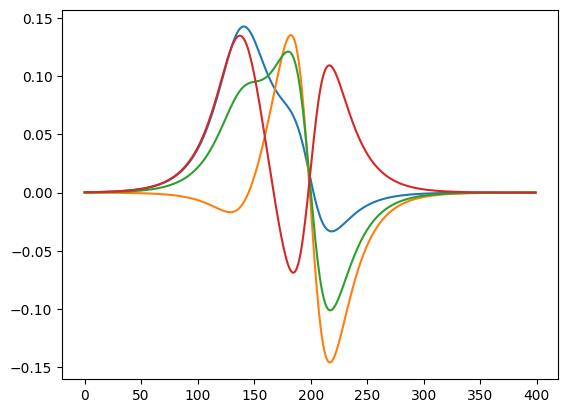

(400, 2)
(400, 2)


In [13]:
#Voy a plotear Phi
fig, ax = plt.subplots(1,1)

ax.plot(Phi)
ax.plot(np.real(U[ : , : 2]), label='Modes')
plt.show()

print(Phi.shape)
print(U[ : , : 2].shape)

In [351]:
#Obtengo mi vector b

x1 = X1[ : , 0]
b = np.linalg.solve(Phi.T, x1)
print(x1.shape)
print(Phi.shape)
print(x1)
# LLegue hasta el minuto38

LinAlgError: Last 2 dimensions of the array must be square